In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import math

In [99]:
df=pd.read_csv("data/clean.csv")

In [100]:
print("columns: ",df.columns)
df.head()

columns:  Index(['sexe', 'date_naiss', 'age', 'sit_fam', 'job_ok', 'nbre_enf', 'nature',
       'design', 'ann_dipl', 'ordre', 'mode_ent', 'annee_ent', 'date_ent',
       'corps_ent', 'poste_ent', 'lieu_af', 'motif_affect', 'fonction_af',
       'division_af', 'service_af', 'direction_af', 'date_ps', 'dat_retraite',
       'poste_act', 'job_act', 'dt_echeance', 'tot_afct', 'statut_act'],
      dtype='object')


,sexe,date_naiss,age,sit_fam,job_ok,nbre_enf,nature,design,ann_dipl,ordre,...,division_af,service_af,direction_af,date_ps,dat_retraite,poste_act,job_act,dt_echeance,tot_afct,statut_act
0,MASCULIN,26/07/1974,44.0,MARIE(E),0,1,DIPLOME,CERTIFICAT D'ETUDES PRIMAIRES ELEMENTAIRES,NaN,1,...,NaN,SOC,DSE,NaN,2034.0,22TP,ECOREUR,2019.0,3,EN FONCTION
1,MASCULIN,11/06/1979,39.0,MARIE(E),1,2,CERTIFICAT,GRAPHISTE ET MAQUETTISTE,NaN,6,...,NaN,SOC,DSE,NaN,2039.0,22TP,CHEF DE SITE INFORMATIQUE,2013.0,1,EN FONCTION
2,MASCULIN,11/06/1979,39.0,MARIE(E),1,2,DIPLOME,DIPLOME D'INGENIEUR EN GENIE ELECTRONIQUE MANAGER,2008.0,1,...,NaN,SOC,DSE,NaN,2039.0,22TP,CHEF DE SITE INFORMATIQUE,2013.0,1,EN FONCTION
3,MASCULIN,11/06/1979,39.0,MARIE(E),1,2,DIPLOME,DIPLOME DE TECHNICIEN SUPERIEUR EN ELECTRONIQUE,2000.0,2,...,NaN,SOC,DSE,NaN,2039.0,22TP,CHEF DE SITE INFORMATIQUE,2013.0,1,EN FONCTION
4,MASCULIN,11/06/1979,39.0,MARIE(E),1,2,CERTIFICAT,ADMINISTRATION RESEAUX-AUF JREWS,NaN,2,...,NaN,SOC,DSE,NaN,2039.0,22TP,CHEF DE SITE INFORMATIQUE,2013.0,1,EN FONCTION


In [101]:
qualitative = []
quantitative = []

for variable in df.columns.tolist():
    if df.dtypes[variable] in ['float64', 'int64']:
        quantitative.append(variable)
    else :
        qualitative.append(variable)

### qualitative

In [102]:
qualitative

['sexe',
 'date_naiss',
 'sit_fam',
 'nature',
 'design',
 'mode_ent',
 'corps_ent',
 'poste_ent',
 'lieu_af',
 'motif_affect',
 'fonction_af',
 'division_af',
 'service_af',
 'direction_af',
 'poste_act',
 'job_act',
 'statut_act']

### quantitative

In [103]:
quantitative

['age',
 'job_ok',
 'nbre_enf',
 'ann_dipl',
 'ordre',
 'annee_ent',
 'date_ent',
 'date_ps',
 'dat_retraite',
 'dt_echeance',
 'tot_afct']

In [104]:
def processPerLevels(data,list_feature):
    catHead = ['Feature', 'Level', 'Count', 'Frequence %']
    count = []
    freq = []
    feature_all = []
    list_level_all = []
    for feature in list_feature:
        
        list_level = data[feature].unique().tolist()

        len_level = len(list_level)

        for level in list_level:
            count_level = len(data.loc[data[feature] == level])
            count.append(count_level)
            freq_level = count_level * 100/len(data)
            freq.append(round(freq_level, 2))
            feature_all.append(feature)
            list_level_all.append(level)
    
    resultDf = pd.DataFrame(columns=catHead)
    resultDf['Level'] = list_level_all
    resultDf['Feature'] = feature_all
    resultDf['Count'] = count
    resultDf['Frequence %'] = freq
    resultDf.set_index(['Feature', 'Level'], inplace=True)
    return resultDf

In [105]:
def getCountModalite(data,list_feature):
    head = ['Feature','Count of level']
    feature_all = []
    count_modalite = []
    
    for feature in list_feature : 
        feature_all.append(feature)
        count_modalite.append(len(pd.unique(data[feature])))
        
    resultDf = pd.DataFrame(columns=head)
    resultDf['Feature'] = feature_all
    resultDf['Count of level'] = count_modalite
    resultDf.set_index(['Feature'], inplace=True)
    return resultDf

In [106]:
variable_qualitative_liste = list(qualitative)
getCountModalite(df,variable_qualitative_liste)

,Count of level
Feature,
sexe,2
date_naiss,1123
sit_fam,5
nature,6
design,1614
mode_ent,6
corps_ent,34
poste_ent,83
lieu_af,107


<h2><center>Nombre de modalite pour chaque feature</center></h2>

### SEXE

In [107]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[0]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                       
sexe    MASCULIN  10541        68.27
        FEMININ    4900        31.73

### DATE DE NAISSANCE

In [108]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[1]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature    Level                         
date_naiss 04/05/1962    180         1.17
           16/03/1958    130         0.84
           12/05/1977    120         0.78
           19/12/1976    111         0.72
           01/01/1958    108         0.70
           13/03/1973    100         0.65
           20/02/1978     99         0.64
           20/07/1961     98         0.63
           06/01/1975     90         0.58
           03/01/1973     81         0.52
           27/05/1963     77         0.50
           03/05/1966     76         0.49
           20/11/1971     72         0.47
           01/09/1963     70         0.45
           10/05/1971     69         0.45
           19/07/1978     66         0.43
           09/03/1971     66         0.43
           02/09/1980     65         0.42
           05/06/1961     60         0.39
           21/07/1977     60         0.39
           02/03/1965     60         0.39
           13/03/1965     60         0.39
           30/06/1972     60         0.39
           16/02/1975     60         0.39
           21/11/1981     60         0.39
           25/03/1959     56         0.36
           12/09/1955     56         0.36
           26/08/1965     55         0.36
           25/09/1972     55         0.36
           10/02/1971     54         0.35
           15/10/1981     54         0.35
           12/09/1979     54         0.35
           22/03/1971     54         0.35
           07/11/1976     54         0.35
           06/04/1964     54         0.35
           15/03/1968     53         0.34
           12/02/1971     52         0.34
           11/07/1979     52         0.34
           26/04/1976     52         0.34
           29/05/1978     50         0.32
           04/10/1979     50         0.32
           21/05/1977     50         0.32
           11/01/1970     50         0.32
           15/04/1967     49         0.32
           13/07/1968     49         0.32
           07/02/1980     49         0.32
           07/12/1967     49         0.32
           06/09/1963     48         0.31
           01/08/1972     48         0.31
           17/12/1969     48         0.31
           09/03/1975     48         0.31
           11/11/1961     48         0.31
           20/10/1969     46         0.30
           01/08/1970     45         0.29
           10/05/1974     45         0.29
           02/08/1969     45         0.29
           28/11/1978     45         0.29
           24/11/1967     44         0.28
           17/11/1972     44         0.28
           18/08/1971     44         0.28
           28/11/1962     44         0.28
           08/02/1974     43         0.28
           01/05/1956     42         0.27
           03/10/1978     42         0.27
           16/06/1967     42         0.27
           26/05/1968     42         0.27
           20/08/1981     42         0.27
           08/11/1977     42         0.27
           26/01/1966     42         0.27
           16/09/1967     42         0.27
           24/09/1978     42         0.27
           30/01/1967     42         0.27
           23/02/1963     42         0.27
           30/10/1972     42         0.27
           06/08/1956     42         0.27
           25/09/1969     40         0.26
           30/03/1974     40         0.26
           06/12/1974     40         0.26
           28/12/1980     40         0.26
           23/05/1980     40         0.26
           02/06/1959     40         0.26
           19/06/1979     40         0.26
           01/01/1981     40         0.26
           16/03/1960     40         0.26
           26/08/1972     40         0.26
           19/04/1971     40         0.26
           08/08/1977     40         0.26
           28/01/1969     38         0.25
           30/11/1980     38         0.25
           28/12/1978     38         0.25
           13/03/1979     37         0.24
           06/01/1973     37         0.24
           30/11/1974     36         0.23
           14/09/1957     36     

### SITUATION FAMILIALE

In [109]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[2]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                          
sit_fam MARIE(E)     12385        80.21
        CELIBATAIRE   1877        12.16
        DIVORCE(E)     566         3.67
        VEUF(VE)       293         1.90
        NaN              0         0.00

### NATURE DIPLOME

In [110]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[3]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                                       
nature  DIPLOME                    9485        61.43
        APTITUDE PROFESSIONNEL     2634        17.06
        CERTIFICAT                 1981        12.83
        FORMATION                   690         4.47
        ATTESTATION                 442         2.86
        APTITUDE PROFESSIONNELLE    209         1.35

#### design

In [111]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[4]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                                                                 
design  CEPE                                                 1277         8.27
        BEPC                                                 1077         6.97
        DIPLOME DE HAUTES ETUDES EN ADMINISTRATION DOUA...    579         3.75
        BACCALAUREAT                                          540         3.50
        BACCALAUREAT A2                                       353         2.29
        BACCALAUREAT D                                        206         1.33
        DIPLOME D'ETUDES SUPERIEURES EN DOUANES               190         1.23
        FORMATION MILITAIRE                                   169         1.09
        RAPPROCHEMENT DES DONNEES COMPTABLES                  153         0.99
        MAITRISE EN DROIT PRIVE                               143         0.93
        INFORMATIQUE                                          140         0.91
        EX-BEPC                                               131         0.85
        MANAGEMENT ET LEADERSHIP                              130         0.84
        LICENCE EN GESTION                                    123         0.80
        BACCALAUREAT SERIE D                                  120         0.78
        BREVET D'ETUDES DU PREMIER CYCLE                      119         0.77
        MAITRISE EN GESTION                                   111         0.72
        BUREAUTIQUE                                           110         0.71
        BACCALAUREAT C                                        108         0.70
        CERTIFICAT D'ETUDES PRIMAIRES ELEMENTAIRES            100         0.65
        BACCALAUREAT SERIE C                                   99         0.64
        BREVET D'AGENT D'EXECUTION                             89         0.58
        SYDONIA++                                              86         0.56
        LICENCE EN DROIT                                       79         0.51
        INFORMATIQUE BUREAUTIQUE                               78         0.51
        BACCALAUREAT SERIE A2                                  77         0.50
        CFEPCES                                                76         0.49
        MAITRISE EN DROIT                                      75         0.49
        BREVET TECHNIQUE                                       71         0.46
        BACCALAUREAT TECHNIQUE                                 64         0.41
        MAITRISE ES-SCIENCES ECONOMIQUES                       62         0.40
        LEADERSHIP                                             60         0.39
        BACCALAUREAT A1                                        60         0.39
        LEADERSHIP ET MANAGEMENT                               56         0.36
        FORMATION MILITAIRE ELEMENTAIRE                        53         0.34
        ANGLAIS                                                52         0.34
        MAITRISE EN ECONOMIE                                   48         0.31
        BACCALAUREAT G2                                        45         0.29
        MECANIQUE AUTOMOBILE                                   45         0.29
        MISE A NIVEAU                                          44         0.28
        COMMERCE INTERNATIONAL                                 43         0.28
        BACCALAUREAT+3                                         38         0.25
        MAITRISE ES SCIENCES ECONOMIQUES                       37         0.24
        FORMATION DE MISE A NIVEAU                             36         0.23
        MANAGEMENT                                             36         0.23
        LICENCE EN ECONOMIE                                    36         0.23
        BACCALAUREAT+2                                         36         0.23
        SECRETARIAT                                            34         0.22
        ETHIQUE ET DEONTOLOGIE                                 34         0.22
        GESTION AXEE SUR LES RE


### mode_ent

In [112]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[5]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature  Level                                     
mode_ent CONCOURS DIRECT         11775        76.26
         CONTRAT D'ENGAGEMENT     2521        16.33
         DECISION D'ENGAGEMENT     984         6.37
         AFFECTATION DEFINITIVE    146         0.95
         DETACHEMENT                 8         0.05
         NaN                         0         0.00

### corps_ent

In [113]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[6]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  \
Feature   Level                                                       
corps_ent INSPECTEUR DES DOUANES                               2789   
          CONTROLEUR DES DOUANES                               2649   
          AGENT DE CONSTATATION DES DOUANES                    2326   
          PREPOSE DES DOUANES                                  2166   
          EFA3                                                 1565   
          AGENT D'ENCADREMENT DES DOUANES                      1219   
          ELD4                                                  899   
          EFA4                                                  334   
          EFA8                                                  265   
          EFA2                                                  168   
          ASSISTANT D'ENSEIGNEMENT SUPERIEUR ET DE RECHERCHE    140   
          EFA6                                                  117   
          CHEF DE BUREAU DES SCES FINANCIERS                     90   
          EMPLOYE DE COURTE DUREE                                89   
          EFA1                                                   88   
          PROFESSEUR CERTIFIE                                    88   
          ADMINISTRATEUR DE SERVICE DE L' A.N.                   67   
          OFFICIER DE POLICE                                     64   
          MILITAIRE                                              60   
          INSPECTEUR DU TRAVAIL ET DES LOIS SOCIALES             41   
          ASSISTANT D'ADMINISTRATION                             40   
          EFA5                                                   36   
          ADJOINT D'ADMINISTRATION                               34   
          ADMINISTRATEUR D'UNIVERSITE                            21   
          SOUS-CHEF DE BUREAU DES SCES FINANCIERS                18   
          INSPECTEUR PENITENTIAIRE                               16   
          EFA7                                                   11   
          PERCEPTEUR DES FINANCES                                10   
          EFA9                                                    8   
          CONTROLEUR DES IMPOTS                                   7   
          ADMINISTRATEUR CIVIL                                    5   
          INGENIEUR PRINCIPAL DE LA STATISTIQUE                   4   
          ADMINISTRATEUR DES SCES FINANCIERS                      3   
          NaN                                                     0   

                                                              Frequence %  
Feature   Level                                                            
corps_ent INSPECTEUR DES DOUANES                                    18.06  
          CONTROLEUR DES DOUANES                                    17.16  
          AGENT DE CONSTATATION DES DOUANES                         15.06  
          PREPOSE DES DOUANES                                       14.03  
          EFA3                                                      10.14  
          AGENT D'ENCADREMENT DES DOUANES                            7.89  
          ELD4                                                       5.82  
          EFA4                                                       2.16  
          EFA8                                                       1.72  
          EFA2                                                       1.09  
          ASSISTANT D'ENSEIGNEMENT SUPERIEUR ET DE RECHERCHE         0.91  
          EFA6                                                       0.76  
          CHEF DE BUREAU DES SCES FINANCIERS                         0.58  
          EMPLOYE DE COURTE DUREE                                    0.58  
          EFA1                                                       0.57  
          PROFESSEUR CERTIFIE                                        0.57  
          ADMINISTRATEUR DE SERVICE DE L' A.N.                       0.43  
          OFFICIER DE POLICE                                 

###  POSTE D'ENTREE

In [114]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[7]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature   Level                       
poste_ent 21TO       2361        15.29
          12IV       1988        12.87
          11AN       1296         8.39
          42MG        782         5.06
          SLF         779         5.05
          34AS        632         4.09
          DESD        609         3.94
          DGD         606         3.92
          SAF         572         3.70
          DSCD        550         3.56
          AUTRES      507         3.28
          SAJC        414         2.68
          SCRS        407         2.64
          53TL        353         2.29
          35NB        276         1.79
          SAGRH       235         1.52
          51MD        195         1.26
          13AB        186         1.20
          22TP        164         1.06
          SS          154         1.00
          SVO         136         0.88
          SDI         131         0.85
          DAGD        117         0.76
          SED         113         0.73
          54TG        113         0.73
          SRH          89         0.58
          SLR          83         0.54
          63FI         66         0.43
          SE/DSCD      66         0.43
          SRI          65         0.42
          17ZO         63         0.41
          31AH         62         0.40
          61MK         58         0.38
          DLRE         56         0.36
          32SA         53         0.34
          SID          53         0.34
          ENSD         51         0.33
          15ZS         49         0.32
          DAJLF        48         0.31
          SSLC         45         0.29
          SAE          45         0.29
          SAGD         43         0.28
          SCAP         42         0.27
          16ZE         41         0.27
          CCSEAD       39         0.25
          62MJ         38         0.25
          23MA         37         0.24
          SSAE         37         0.24
          DAAD         37         0.24
          DTERD        34         0.22
          SBID         32         0.21
          SSD          32         0.21
          SAI          28         0.18
          SST          27         0.17
          BUDORS       27         0.17
          SDC          26         0.17
          SOC          24         0.16
          SCD          21         0.14
          DSE          21         0.14
          SCRU         20         0.13
          DLSD         20         0.13
          SCDD         19         0.12
          SRDAAMI      16         0.10
          SE           13         0.08
          SCC          12         0.08
          SSOC         11         0.07
          SRAR         11         0.07
          41AL         10         0.06
          PRMP          9         0.06
          DLV           9         0.06
          33VO          9         0.06
          DNFP          6         0.04
          25BT          6         0.04
          14MA          6         0.04
          SI            5         0.03
          24SM          5         0.03
          SF            3         0.02
          SFRC/DNF      2         0.01
          CIR           2         0.01
          SCSR          1         0.01
          CPERF         1         0.01
          CDL           1         0.01
          NaN           0         0.00


### JOB ACTUEL

In [115]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[8]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                                                                 
lieu_af IVATO-AEROPORT                                       1854        12.01
        BUREAU DES DOUANES DE TOAMASINA PORT                 1463         9.47
        ANTANANARIVO                                         1350         8.74
        MAHAJANGA                                             646         4.18
        SERVICE DE LA LUTTE CONTRE LA FRAUDE                  612         3.96
        SERVICE DE LA LEGISLATION ET DE LA REGLEMENTATION     485         3.14
        MAMORY-IVATO                                          427         2.77
        SERVICE ADMINISTRATIF ET FINANCIER                    314         2.03
        SERVICE DES AFFAIRES JURIDIQUES ET DU CONTENTIEUX     309         2.00
        ANTSIRANANA                                           307         1.99
        SERVICE DE LA SURVEILLANCE ET DE LA LUTTE CONTR...    295         1.91
        TOAMASINA-PETROLES                                    290         1.88
        DIRECTION GENERALE DES DOUANES                        286         1.85
        TOLIARA                                               283         1.83
        SERVICE DU CONTROLE DES REGIMES SUSPENSIFS            243         1.57
        BS TOAMASINA                                          242         1.57
        ANTSIRABE                                             233         1.51
        DIRECTION DES STATISTIQUES ET DE LA COMPTABILIT...    225         1.46
        DIRECTION DES ENQUETES ET DE LA SURVEILLANCE DO...    224         1.45
        NOSY-BE                                               219         1.42
        SERVICE DE LA VALEUR ET DE L'ORIGINE                  188         1.22
        TAOLAGNARO                                            173         1.12
        SERVICE DES RELATIONS INTERNATIONALES                 170         1.10
        BS ANTANANARIVO                                       168         1.09
        FIANARANTSOA                                          162         1.05
        SERVICE DES ACTIONS ECONOMIQUES                       158         1.02
        SERVICE DES RESSOURCES HUMAINES                       157         1.02
        SERVICE DE L'INFORMATIQUE                             154         1.00
        SERVICE DU RENSEIGNEMENT ET DE L'ANALYSE DES RI...    146         0.95
        DIRECTION DES RESSOURCES ET DE LA FORMATION           142         0.92
        SERVICE DE L'INSPECTION DOUANIERE                     131         0.85
        BETAINOMBY DEDIE SHERRITT                             130         0.84
        SERVICE DE PILOTAGE ET DE COORDINATION DES BURE...    127         0.82
        DIRECTION DES SERVICES EXTERIEURS                     126         0.82
        MORONDAVA                                             124         0.80
        SERVICE DES EQUIPEMENTS                               115         0.74
        SERVICE DU RENSEIGNMT, DE LA DOC ET DE L'ASSIST...    114         0.74
        SERVICE DE COORDINATION DES ACTIONS DOUANIERES ...    105         0.68
        ANTENNE DES DOUANES ANOSISOA                          101         0.65
        SERVICE DE LA FORMATION                                96         0.62
        ANTENNE DES DOUANES AMBOHIBAO                          95         0.62
        SERVICE DES OPERATIONS COMMERCIALES                    95         0.62
        SERVICE DE SUIVI DES OPERATIONS COMMERCIALES           95         0.62
        SERVICE DES ETUDES ET DE LA DOCUMENTATION              92         0.60
        CELLULE DE COORDINATION,DE SUIVI ET D'EVALUATIO...     89         0.58
        MANAKARA                                               79         0.51
        VOHEMAR                                                77         0.50
        DIRECTION DES AFFAIRES JURIDIQUES ET DES LUTTES...     77         0.50
        ECOLE NATIONALE SUPERIEURE DES DOUANES                 74         0.48
        SERVICE ADMINISTRATIF E

###  MOTIF D'AFFECTATION

In [116]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[9]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature      Level                                                           
motif_affect COMPLEMENT D'EFFECTIF                          3190        20.66
             Complement d'effectif                          2069        13.40
             NOMINATION                                      643         4.16
             NOMINATION SUR FONCTION                         541         3.50
             ABROGEE                                         454         2.94
             NOMINATION RECEVEUR                              58         0.38
             NOMINATION CHEF DE SERVICE                       34         0.22
             ABROGE                                           33         0.21
             NOMME DIRECTEUR                                  28         0.18
             CE                                               27         0.17
             NOMME RECEVEUR                                   26         0.17
             ANNULEE                                          21         0.14
             NOMME RECEVEUR DES DOUANES                       17         0.11
             NOMINATION CHEF DE POSTE                         16         0.10
             NOMINATION CHEF DE DIVISION                      16         0.10
             NOMME CHEF DE VISITE                             16         0.10
             1ERE AFFECTATION                                 15         0.10
             NOMME CHEF DE SERVICE                            15         0.10
             NOMME DIRECTEUR PAR INTERIM                      14         0.09
             NOMME CHEF DE DIVISION                           12         0.08
             MISE A DISPOSITION                               11         0.07
             MAINTIEN AU BUREAU 22TP                          10         0.06
             NOMINATION CHEF DE SITE                          10         0.06
             EQUIPE NATIONALE SYDONIA                         10         0.06
             NOMME CHEF DE PROJET                             10         0.06
             NOMINATION DIRECTEUR                              9         0.06
             NOMINATION CHEF DE DIV                            9         0.06
             FIN DE MISE A DISPOSITION ET NOMINATION           9         0.06
             REAFFECTATION                                     8         0.05
             CHEF DE DIVISION                                  7         0.05
             NOMME ADJOINT AU RECEVEUR                         7         0.05
             PREMIERE AFFECTATION                              7         0.05
             NOMME CHEF D'ANTENNE                              6         0.04
             PROJET ANALYSE DE MANIFESTE                       6         0.04
             MISE A LA DISPOSITION                             6         0.04
             MUTATION                                          6         0.04
             ABROGATION MAINTIEN 21TO                          6         0.04
             NOMME ADJOINT AU RECEVEUR SOARANO                 6         0.04
             NOMME CHEF DE BRIGADE SPECIALE                    6         0.04
             MAINTIEN AU POSTE                                 6         0.04
             NOMINATION DE CHEF DE SERVICE                     6         0.04
             DAME VISITEUSE                                    5         0.03
             NOMME COORDONNATEUR                               5         0.03
             NOMME RECEVEUR DES DOUANES D'ANTSIRANANA          5         0.03
             NOMME RECEVEUR DES DOUANES DE SAMBAVA             5         0.03
             NOUVELLEMENT NOMME INSPECTEUR                     5         0.03
             NOMINATION CHEF DIV                               5         0.03
             STAGIAIRE COMPLEMENT D'EFFECTIF                   5         0.03
             1ERE POSTE                                        4         0.03
             NOUVELLEMENT NOMME                                4         0.03
   


### FONCTION D'AFFECTATION

In [117]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[10]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  \
Feature     Level                                                       
fonction_af COMPLEMENT D'EFFECTIF                                1974   
            ABROGEE                                               170   
            RECEVEUR DES DOUANES                                  117   
            CHAUFFEUR                                              98   
            CHEF DE DIVISION                                       91   
            VERIFICATEUR                                           91   
            CHEF DE POSTE                                          82   
            CHEF DES OPERATIONS COMMERCIALES                       73   
            SECRETAIRE                                             59   
            CHEF DE SITE INFORMATIQUE                              56   
            CHEF DE VISITE                                         55   
            INFORMATICIEN                                          51   
            ABROGE                                                 47   
            ADJOINT AU RECEVEUR                                    46   
            COORDONNATEUR                                          44   
            PLANTON                                                43   
            IVL                                                    39   
            DIRECTEUR                                              25   
            CHARGE D'ETUDES                                        25   
            CHEF DU SERVICE SRI                                    25   
            CHEF DE SERVICE                                        21   
            RECEVEUR                                               21   
            DEPOSITAIRE COMPTABLE                                  20   
            CHARGE DE MISSION                                      19   
            CHEF DU SERVICE SAE                                    19   
            CHEF RET                                               17   
            RECEVEUR 42MG                                          17   
            DIRECTEUR GENERAL                                      17   
            CHEF DU SERVICE SLR                                    16   
            COORDONNATEUR DU CENTRE DE LIQUIDATION                 16   
            CHEF OPCO 42MG                                         15   
            RECEVEUR DES DOUANES 34AS                              14   
            CHEF DU SERVICE SLF                                    14   
            CHEF BMS                                               14   
            DIRECTEUR DES SERVICES EXTERIEURS                      14   
            DIRECTEUR DE L'ENSD PAR INTERIM                        14   
            RECEVEUR DES DOUANES 12IV                              14   
            DIRECTEUR DNFP                                         14   
            CHEF DE SITE                                           14   
            DIRECTEUR DE L'ENSD                                    14   
            RESPONSABLE DES AVANCEMENTS DES AGENTS AUXILIAIRES     14   
            VISITEUR                                               13   
            DIRECTEUR DAJLF                                        13   
            RECEVEUR DES DOUANES DE NOSY-BE                        12   
            ANALYSTE                                               12   
            AUDITEUR                                               12   
            RECEVEUR INTERIMAIRE                                   12   
            CHEF DE DIVISION FORMATION CONTINUE                    12   
            CHEF DE DIVISION DES RELATIONS AVEC LES USAGERS        12   
            COPCO                                                  12   
            CHEF DE DIVISION TARIF                                 12   
            CHEF DE DIVISION CONTENTIEUX                           11   
            DAME VISITEUSE                                         11   
            ENCADREUR                            


### DIVISION

In [118]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[11]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  \
Feature     Level                                                       
division_af SOLDE                                                 100   
            RECETTE DES DOUANES MAHAJANGA                          59   
            EFFECTIF                                               59   
            RET                                                    22   
            DAA                                                    19   
            OPCO                                                   19   
            CONTROLE DES ENTREPRISES                               13   
            DIVISION PROGRAMMATION                                 12   
            DIVISION MATERIEL                                      12   
            FORMATION CONTINUE                                     12   
            CONTENTIEUX                                            12   
            OPDIV                                                  11   
            COORDINATION DES OPERATIONS ET UNITES DE SURV.         11   
            SUIVI FONCTIONNEL                                      10   
            INFORMATIQUE                                           10   
            RECOUVREMENT                                           10   
            ADJOINT AU RECEVEUR                                     9   
            ETUDES ET CONCEPTION                                    9   
            UNITE DOUANIERE CONTRE LES TRAFICS DE STUP              8   
            MATERIEL                                                8   
            SOCIALES ET LOISIRS                                     8   
            COMPTABILITE DES DOUANES                                7   
            SUIVI STRATEGIQUE                                       7   
            SECRETARIAT                                             7   
            ETUDES ET SUIVI FONCTIONNEL                             7   
            CENTRE DE COORDINATION 12IV                             7   
            ETUDES ET COORDINATION                                  7   
            DAR                                                     7   
            GESTION DE RENSEIGNEMENT ET RELATION INTER SCE          7   
            OPERATION DE SURVEILLANCE                               7   
            VALEUR EN DOUANES ET BDD                                6   
            PROGRAMMATION                                           6   
            OBSERVATOIRE DU DELAI DE DEDOUANEMENT                   5   
            INSPECTION                                              5   
            DIV.PRO.                                                5   
            APPLICATION CONVENTIONS INTERNATIONALES                 5   
            PROCEDURES DOUANIERES                                   5   
            DOCUMENTATION ET ARCHIVES                               5   
            AFFAIRES JURIDIQUES                                     5   
            GESTION DU PARC AUTOMOBILE                              5   
            RELATION AVEC LES USAGERS                               5   
            REGLEMENTATION                                          5   
            CONGE                                                   5   
            AGOA                                                    5   
            ETUDES                                                  5   
            CAP                                                     5   
            ECRITURE                                                5   
            ORIENTATION DU CONTROLE                                 5   
            CONTROLE RET                                            4   
            AUDIT ET PROCEDURE                                      4   
            COOPERATION REGIONALE                                   4   
            COOPERATION AVEC LES ORGANISATIONS INTLES               4   
            DIVPRO                                                  4   
            APPUI                                


### SERVICE

In [119]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[12]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  \
Feature    Level                                                       
service_af SPCB                                                 4502   
           SOC                                                   574   
           SSLC                                                  524   
           SLF                                                   346   
           SLR                                                   288   
           SRH                                                   276   
           SAF                                                   162   
           SAJC                                                  153   
           SVO                                                   150   
           SRAR                                                  140   
           SI                                                    128   
           SAE                                                   125   
           SRI                                                   116   
           SE                                                    113   
           SID                                                   105   
           SSOC                                                   94   
           SCAP                                                   91   
           SF                                                     89   
           SDC                                                    69   
           SCSR                                                   67   
           SCRS                                                   52   
           SRDAAMI                                                47   
           SSAE                                                   44   
           SED                                                    40   
           PRMP                                                   37   
           CPERF                                                  28   
           CDL                                                    21   
           SSC                                                    14   
           CELLULE DE GESTION DE PERFORMANCE                      14   
           CCSEAD                                                 10   
           SST                                                     9   
           SE/DSCD                                                 9   
           SCE APPUI                                               9   
           ENSD                                                    9   
           SERVICE DE COORDINATION ET DU SUIVI DES RE7 BUDGTR      7   
           SAI                                                     7   
           SCRU                                                    7   
           SECRETARIAT GENERAL DU MFB                              6   
           SCC                                                     6   
           SERVICE D'ENQUETE ET D'INVESTIGATION                    5   
           SDI                                                     5   
           SRH (EX-SAF)                                            5   
           SCOLARITE                                               4   
           SCAP (EX-SAF)                                           4   
           EXTERIEUR                                               4   
           CGP                                                     3   
           SSFRC                                                   3   
           EX-SAF                                                  2   
           EX-SST                                                  2   
           SS                                                      2   
           SAF/DNFP                                                2   
           SSD                                                     1   
           SAGD                                                    1   
           NaN                                                     0   

                              


### DIRECTION

In [120]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[13]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature      Level                                       
direction_af DSE                        4093        26.51
             DGD                         659         4.27
             DRF                         609         3.94
             DAJLF                       596         3.86
             DLV                         460         2.98
             DSCD                        376         2.44
             DLRE                        140         0.91
             DNFP                         54         0.35
             DLR                          52         0.34
             DESD                         16         0.10
             EX-DNFP                      14         0.09
             SPCB                         13         0.08
             DISCD                        13         0.08
             DAAD                         10         0.06
             DCI                           9         0.06
             SG DU MBDPA ANTANANARIVO      7         0.05
             MFB/SG                        6         0.04
             DAGD                          5         0.03
             SVO                           5         0.03
             EX-DLRE                       2         0.01
             DVL                           2         0.01
             DTERD                         1         0.01
             NaN                           0         0.00


### POSTE ACTUEL

In [121]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[14]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature   Level                     
poste_act 12IV     1906        12.34
          21TO     1510         9.78
          11AN     1430         9.26
          14MA      889         5.76
          SLF       865         5.60
          42MG      615         3.98
          SSLC      490         3.17
          DGD       449         2.91
          SLR       434         2.81
          BSTMM     419         2.71
          22TP      404         2.62
          SAJC      378         2.45
          SRAR      309         2.00
          DRF       247         1.60
          SVO       246         1.59
          63FI      244         1.58
          35NB      235         1.52
          SF        235         1.52
          SRH       221         1.43
          SI        215         1.39
          25BT      208         1.35
          53TL      206         1.33
          SPCB      205         1.33
          SCSR      201         1.30
          SID       200         1.30
          BSTNR     189         1.22
          13AB      179         1.16
          34AS      169         1.09
          SE        160         1.04
          SCAP      156         1.01
          33VO      154         1.00
          DSE       140         0.91
          SDC       138         0.89
          CDL       117         0.76
          DLV       109         0.71
          32SA       97         0.63
          DSCD       97         0.63
          54TG       93         0.60
          SRI        92         0.60
          51MD       92         0.60
          SSOC       87         0.56
          AUTRES     81         0.52
          SAE        79         0.51
          SSAE       60         0.39
          PRMP       55         0.36
          31AH       52         0.34
          CPERF      48         0.31
          DAJLF      47         0.30
          61MK       46         0.30
          BRX        37         0.24
          PRS        25         0.16
          ILMAU      24         0.16
          62MJ       15         0.10
          GNV         9         0.06
          PSMJG       9         0.06
          PSTUL       6         0.04
          PSTAO       6         0.04
          24SM        5         0.03
          PSNSB       4         0.03
          23MA        3         0.02

### JOB ACTUEL

In [122]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[15]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                                                                 
job_act VERIFICATEUR                                          395         2.56
        CHAUFFEUR                                             271         1.76
        Visiteur ESCALE                                       268         1.74
        SECRETAIRE                                            237         1.53
        AGENT VISITEUR                                        230         1.49
        Secr?taire                                            219         1.42
        ADJOINT AU RECEVEUR                                   184         1.19
        CHEF RET-VERIFICATEUR                                 180         1.17
        AGENT DE SURVEILLANCE                                 178         1.15
        INFORMATICIEN                                         176         1.14
        CHEF DE DIVISION                                      166         1.08
        VISITEUR                                              166         1.08
        AGENT D'INTERVENTION                                  166         1.08
        CHEF DES OPERATIONS COMMERCIALES                      160         1.04
        charg? d'enqu?tes                                     144         0.93
        BRIGADE                                               142         0.92
        CHEF DE DIVISION DU CONTR?LE EN ENTREPRISE            130         0.84
        CHEF DE POSTE                                         124         0.80
        CHARGE DES AFFAIRES CONTENTIEUSES                     124         0.80
        D?positaire Comptable                                 118         0.76
        COMPLEMENT D'EFFECTIF                                 117         0.76
        Planton                                               109         0.71
        ADJOINT CHEF SECTEUR                                  108         0.70
        CHARGE D'ENQUETES NIVEAU 2                            106         0.69
        RECEVEUR DES DOUANES 12IV                             104         0.67
        PLANTON                                               102         0.66
        CHEF DE SERVICE SLF                                   100         0.65
        AGENT DE BRIGADE                                      100         0.65
        CHARGE DE LA RECEVABILITE                             100         0.65
        CAISSIER                                              100         0.65
        CHARGE DE MISSION MISE EN PLACE DU SCE D'ENQU?TE       98         0.63
        RECEVEUR DES DOUANES                                   98         0.63
        Visiteur                                               96         0.62
        CHEF DE SITE INFORMATIQUE                              94         0.61
        CHARGE DE LA COMPTABILITE                              90         0.58
        DIRECTEUR DE LA LEGISLATION ET DE LA VALEUR            90         0.58
        CHARGE D'ETUDES                                        88         0.57
        CHARGE MANIFESTE                                       86         0.56
        CHEF RET                                               83         0.54
        CHEF DE DIVISION ETUDES ET CONCEPTIONS                 81         0.52
        GARDIEN                                                80         0.52
        CHEF DES OPERATIONS COMMERCIALES-BILLETEUR             79         0.51
        V?rificateur                                           76         0.49
        CHEF DE MISSION STRATEGIE DE MODERNISATION             72         0.47
        CONSEILLER AUX AFFAIRES DOUANIERES                     70         0.45
        D?positaire comptable                                  68         0.44
        ADJOINT CHEF DE POSTE                                  67         0.43
        CHEF DE DIVISION CONTENTIEUX                           66         0.43
        COORDONNATEUR                                          64         0.41
        V?rificateur - Liquidat

### STATUT

In [123]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[16]])
proportion_modalite.sort_values(by='Count', ascending=False)


Count  Frequence %
Feature    Level                             
statut_act EN FONCTION     13847        89.68
           RETRAITE(E)      1395         9.03
           DECEDE(E)         119         0.77
           FIN DE CONTRAT     15         0.10
           NaN                 0         0.00

<h2><center>descriptive</center><h2>

In [124]:
df[qualitative].describe().T

,count,unique,top,freq
sexe,15441,2,MASCULIN,10541
date_naiss,15441,1123,04/05/1962,180
sit_fam,15121,4,MARIE(E),12385
nature,15441,6,DIPLOME,9485
design,15426,1613,CEPE,1277
mode_ent,15434,5,CONCOURS DIRECT,11775
corps_ent,15437,33,INSPECTEUR DES DOUANES,2789
poste_ent,15411,82,21TO,2361
lieu_af,15441,107,IVATO-AEROPORT,1854
motif_affect,7516,80,COMPLEMENT D'EFFECTIF,3190


<h2><center>Diagramme circulaire</center></h2>

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 4 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 4 missing from current font.
  font.set_text(s, 0, flags=flags)


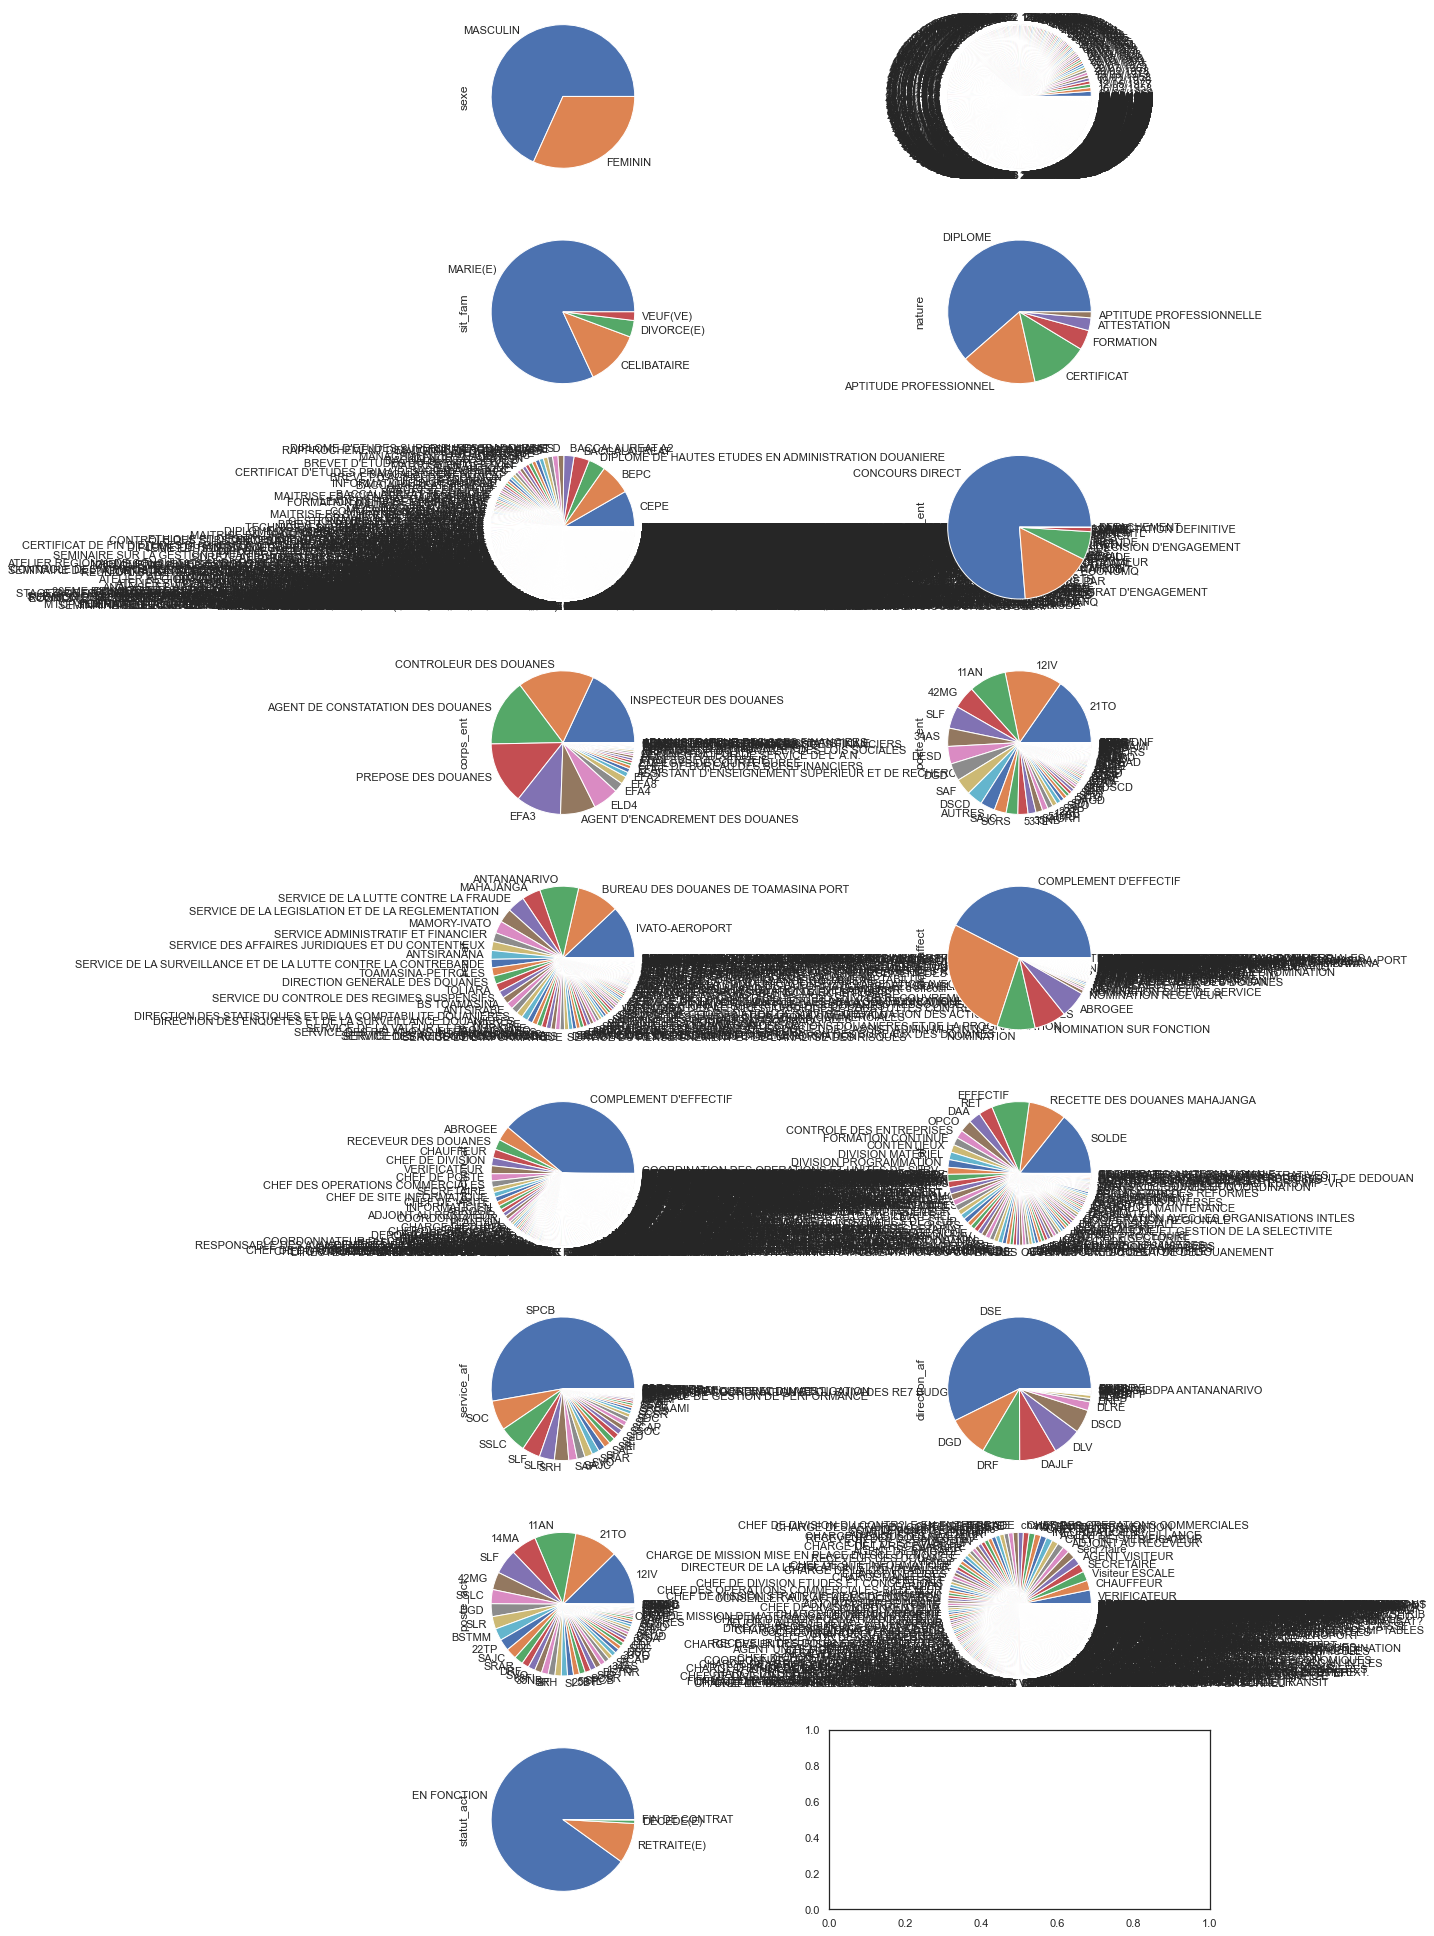

In [125]:
nb_line = int(len(qualitative)/2) +1

nb_column = 2
f, axes = plt.subplots(nb_line, nb_column, figsize=(15, 35), sharex=False)

i,j =0, 0
for col in qualitative :
    if j == 2:
        j = 0
        i = i+1
    df[col].value_counts().plot.pie(ax=axes[i, j])

    j=j+1

In [126]:
def diagramme_2_categorielle(val1,val2):
    area2=val1+"_"
    workout_type2 = val2[:13]+"_"
    
    top6 = list(df[val1].value_counts().index[:5])
    df[area2] = df[val1]

    msk = df[area2].isin(top6)
    df.loc[~msk, area2] = 'Other'

    top4 = list(df[val2].value_counts().index[:3])
    df[workout_type2] = df[val2]

    msk = df[workout_type2].isin(top4)
    df.loc[~msk, workout_type2] = 'Other'

    order = df[area2].value_counts().index # order the columns from highest count to lowest.
    sns.catplot(x=workout_type2,
                col=area2,
                col_order=order,
                kind="count", data=df,aspect=0.5)

### Diagramme à barres: deux variables catégoriques

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


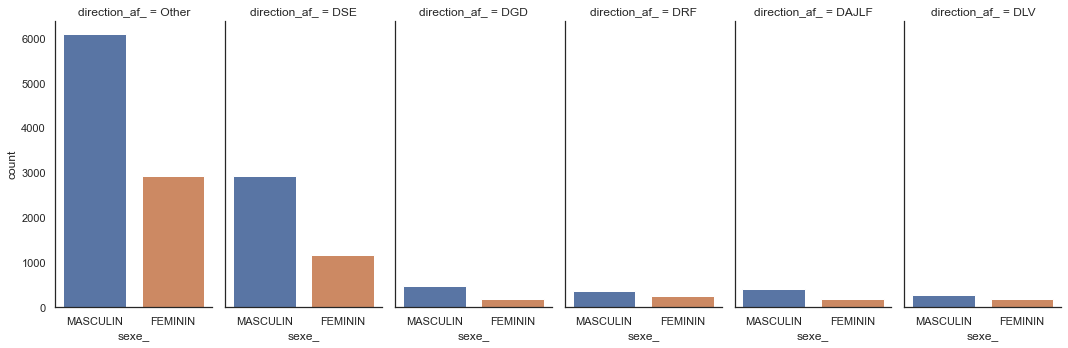

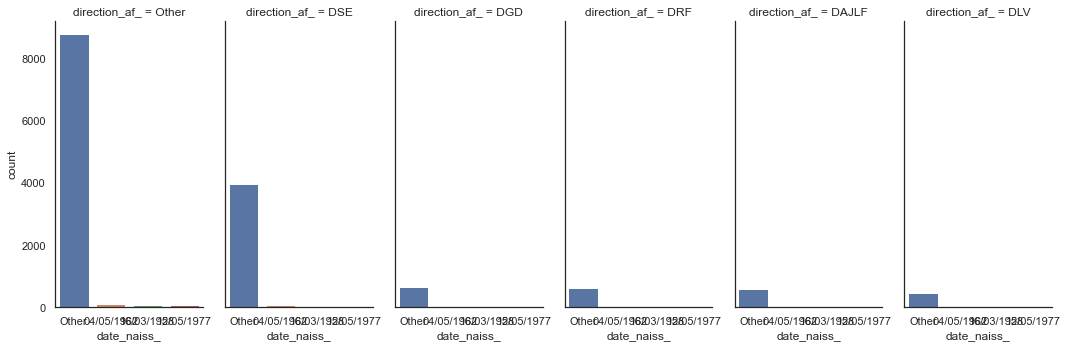

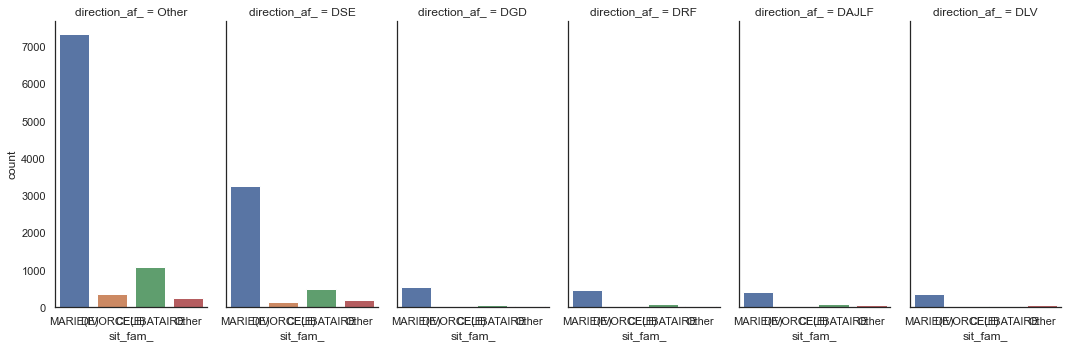

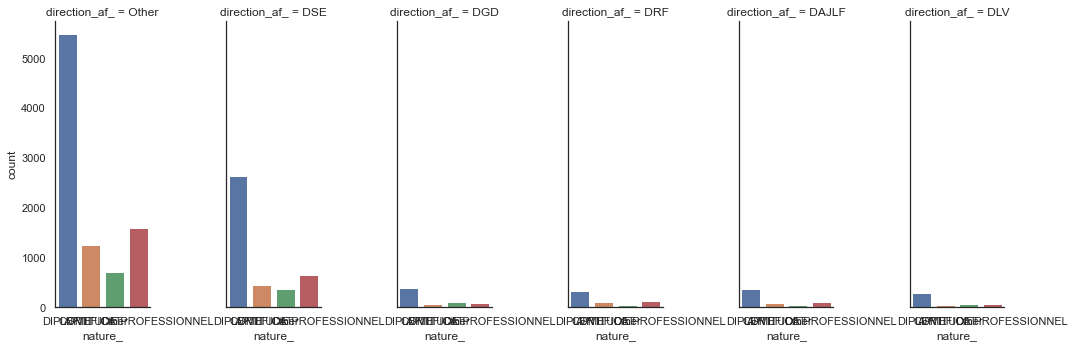

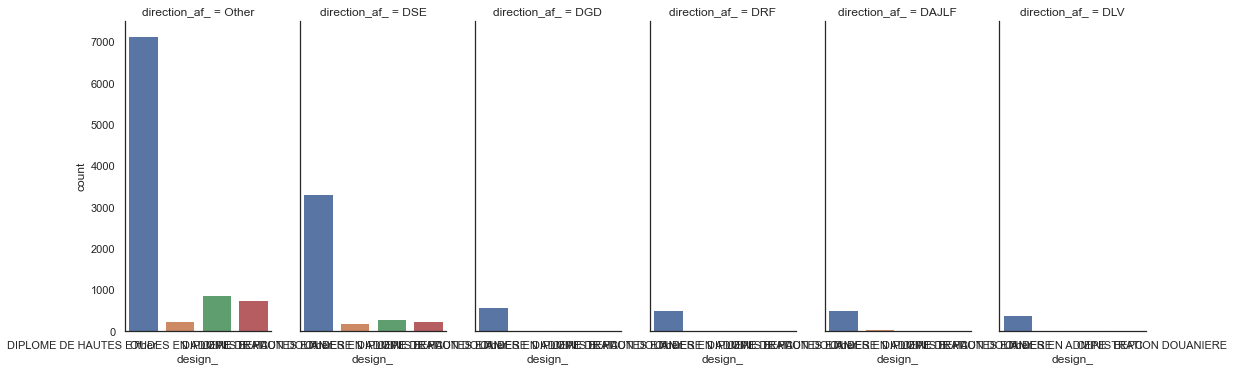

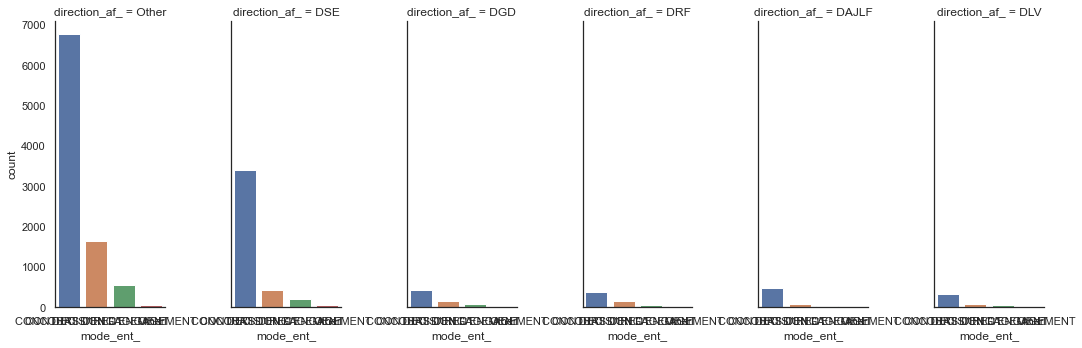

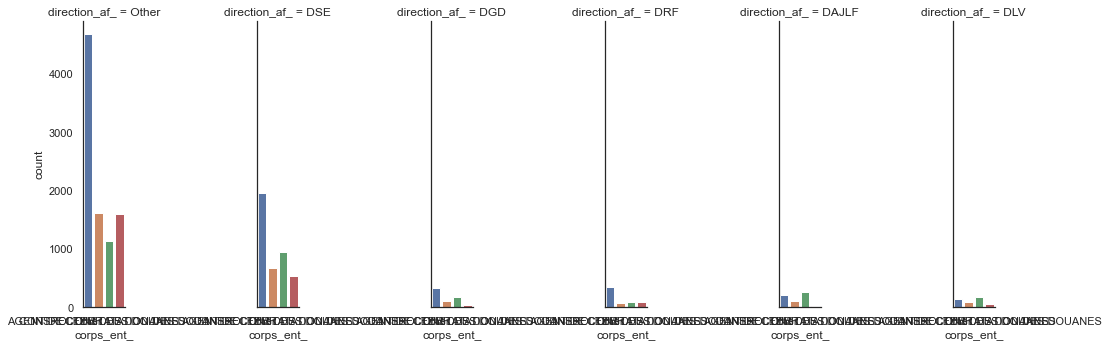

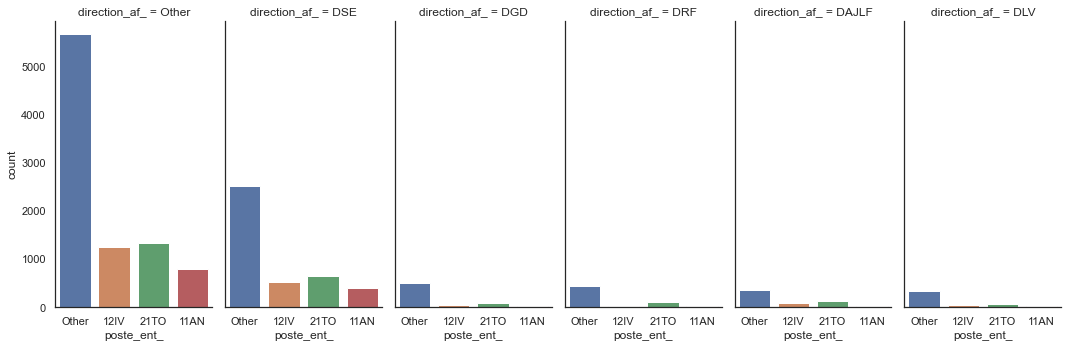

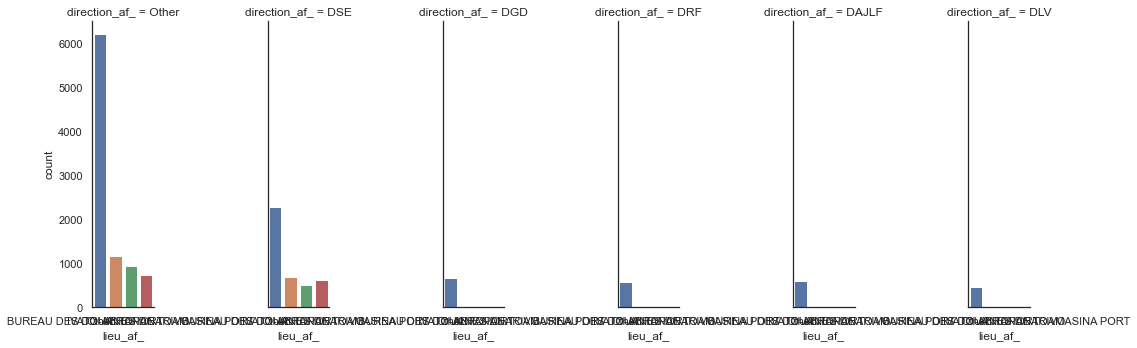

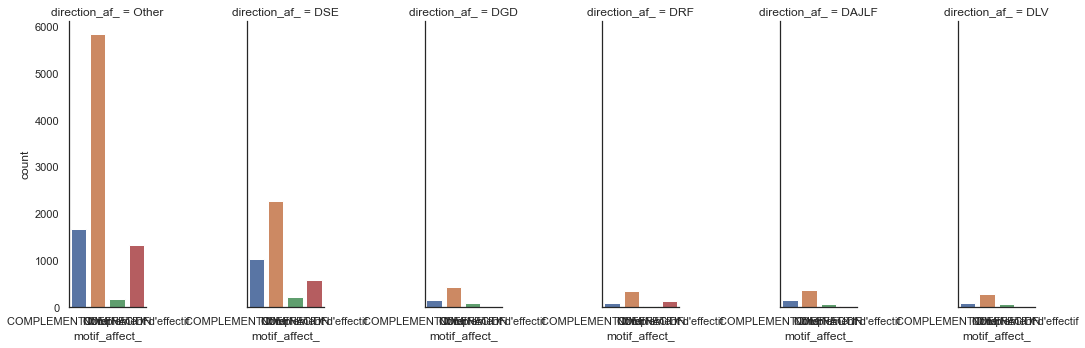

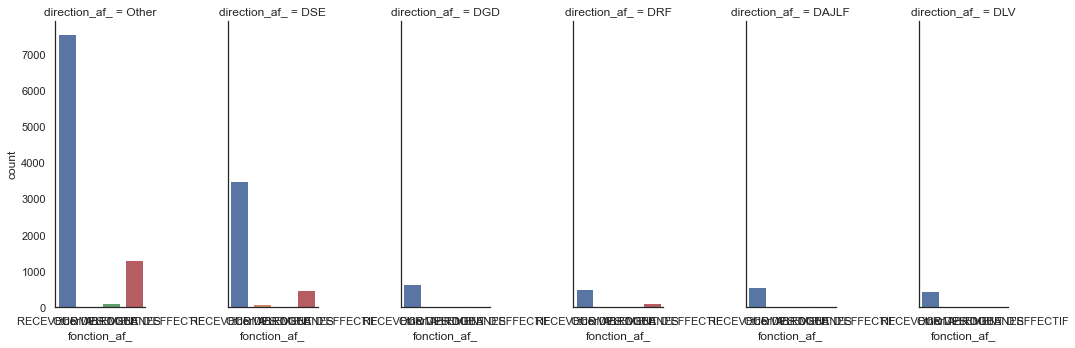

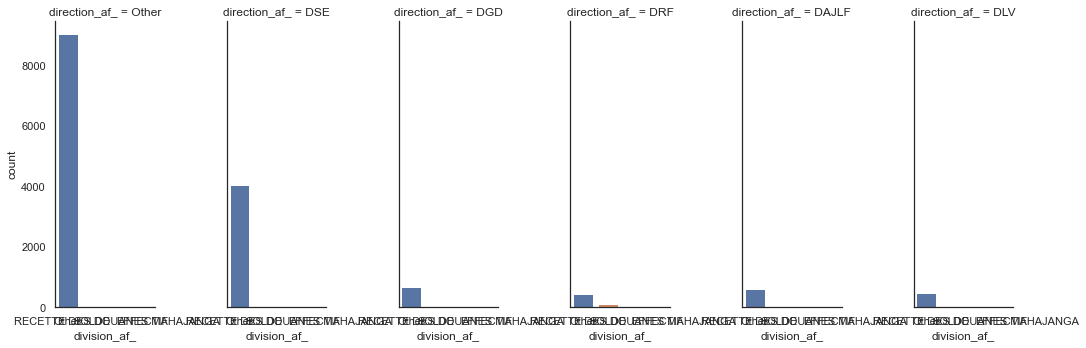

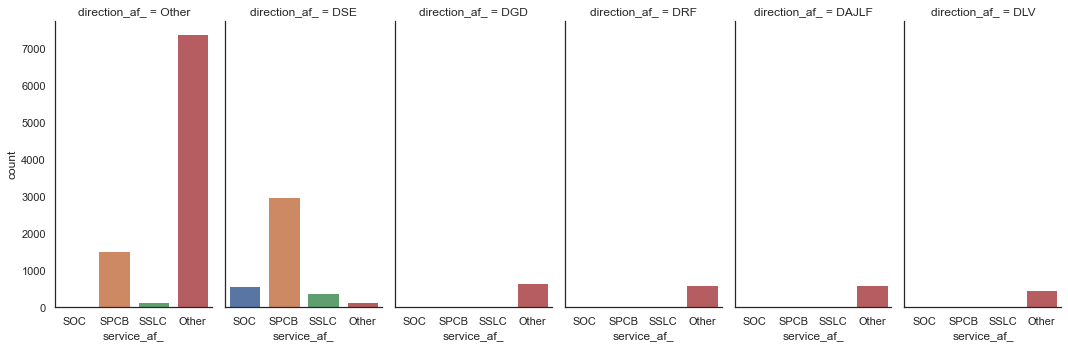

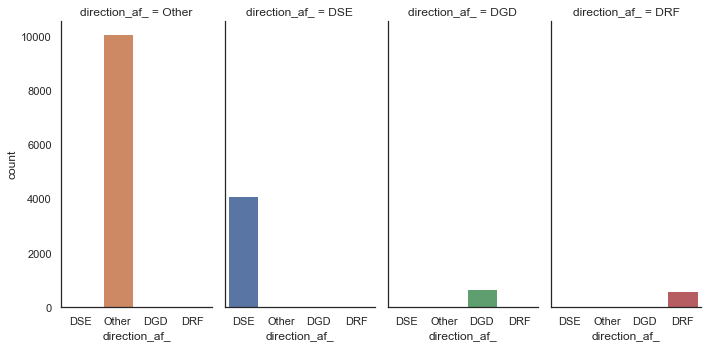

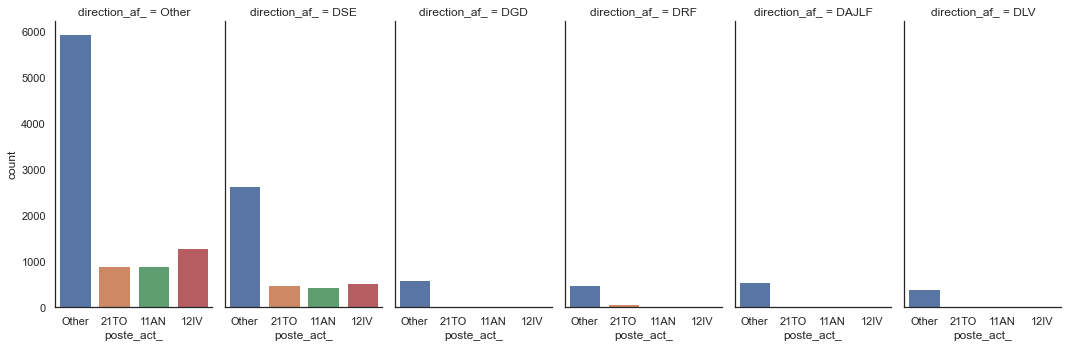

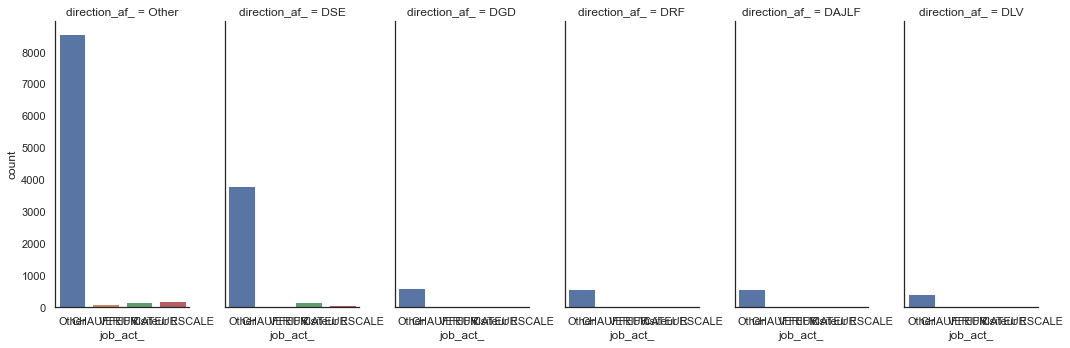

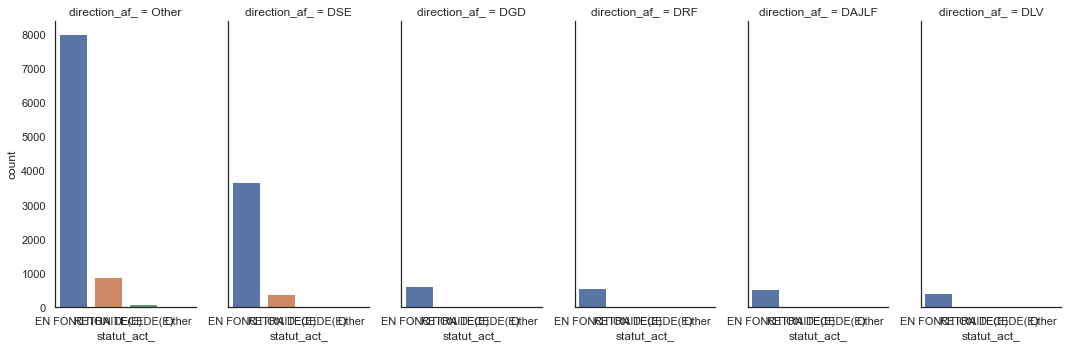

In [127]:
for i in range(len(qualitative)):
    diagramme_2_categorielle(qualitative[13],qualitative[i])

### Boxplot: Variables numériques et catégorielles

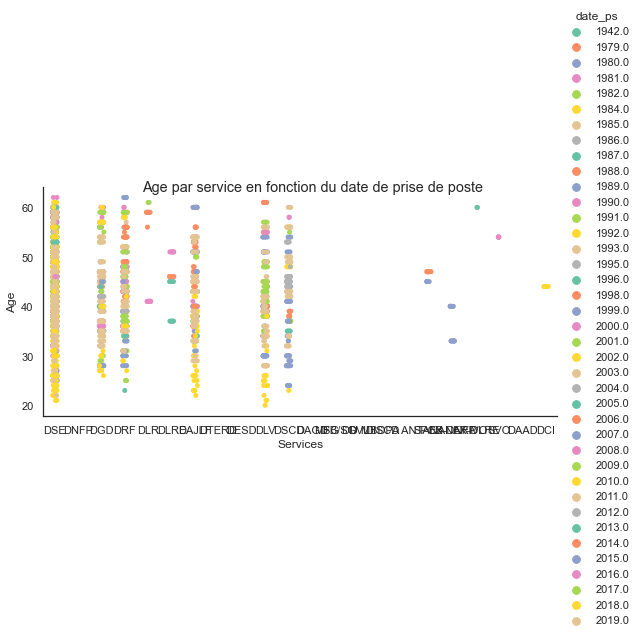

In [128]:
# sns.boxplot(x=qualitative[13], y=quantitative[0], data=df)
# plt.figure(figsize=(8,5))
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[0], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Age par service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Age")
# plt.show()

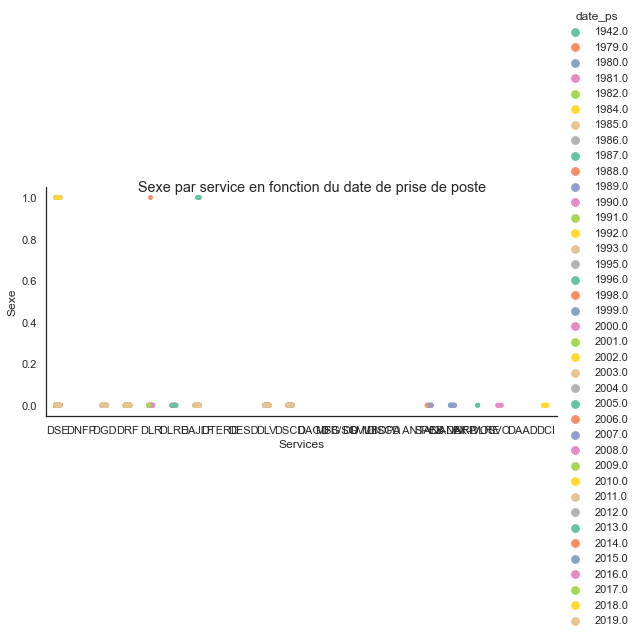

In [129]:
# sns.boxplot(x=qualitative[13], y=quantitative[1], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[1], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Sexe par service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Sexe")

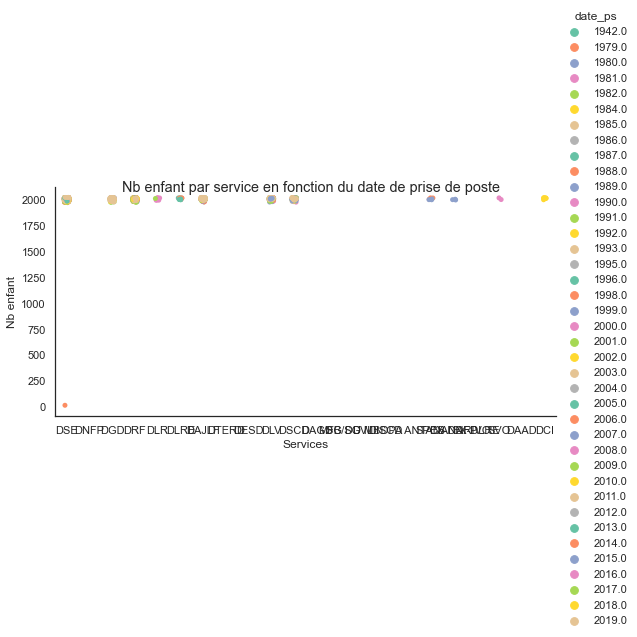

In [130]:
# sns.boxplot(x=qualitative[13], y=quantitative[3], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[3], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Nb enfant par service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Nb enfant")

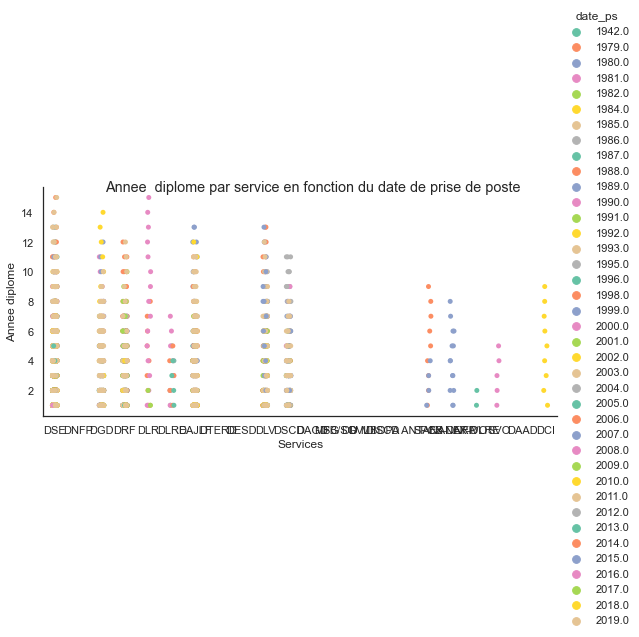

In [131]:
# sns.boxplot(x=qualitative[13], y=quantitative[4], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[4], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Annee  diplome par service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Annee diplome")

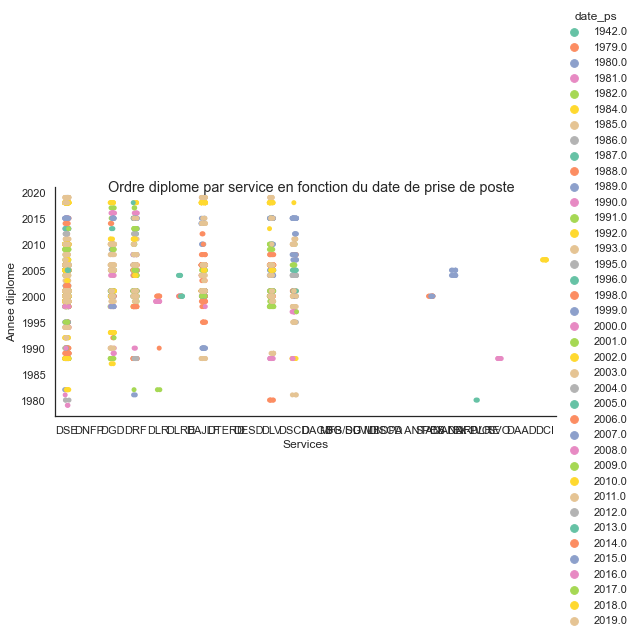

In [132]:
# sns.boxplot(x=qualitative[13], y=quantitative[5], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[5], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Ordre diplome par service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Annee diplome")

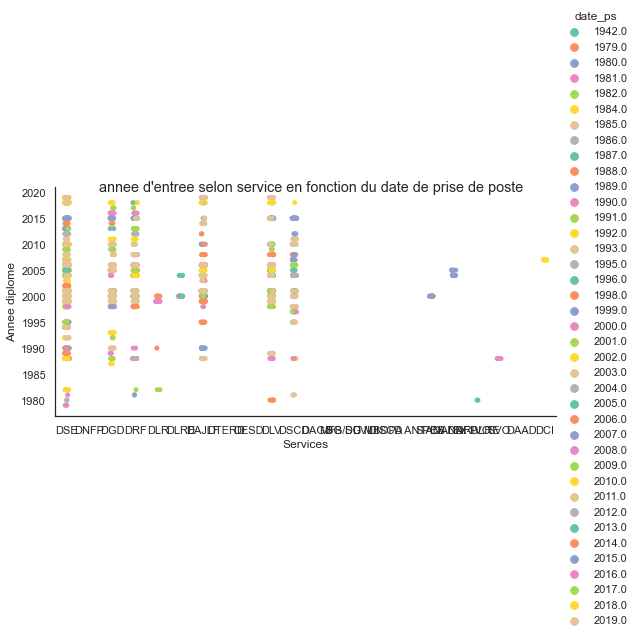

In [133]:
# sns.boxplot(x=qualitative[13], y=quantitative[6], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[6], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("annee d'entree selon service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Annee diplome")

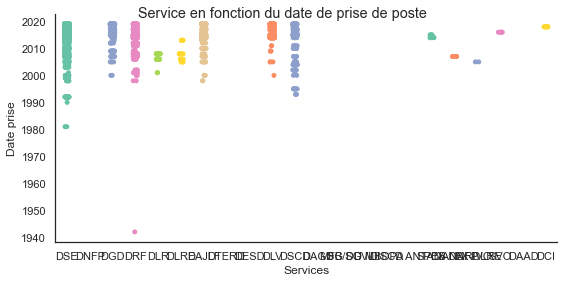

In [134]:
# sns.boxplot(x=qualitative[13], y=quantitative[7], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Date prise")

# sns.set(style="darkgrid")
# sns.histplot(data=df, x=qualitative[13], color="green", label="Frequence dans service", kde=True)
# plt.legend()
# plt.show()

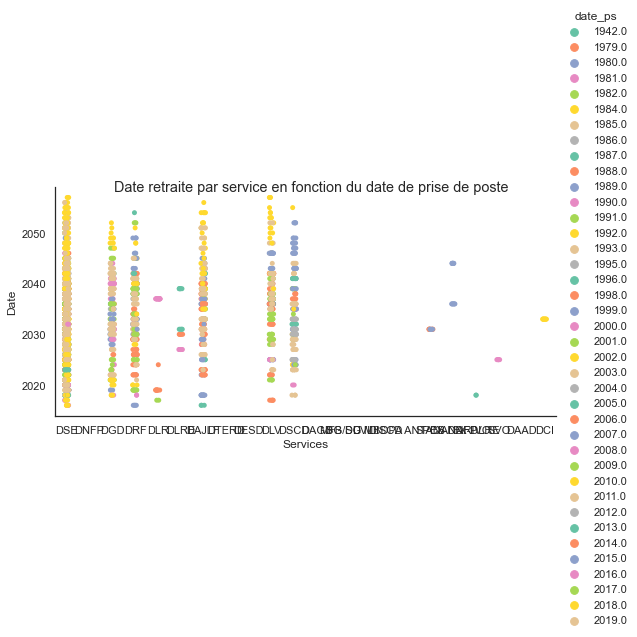

In [135]:
# sns.boxplot(x=qualitative[13], y=quantitative[8], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[8], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Date retraite par service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Date")

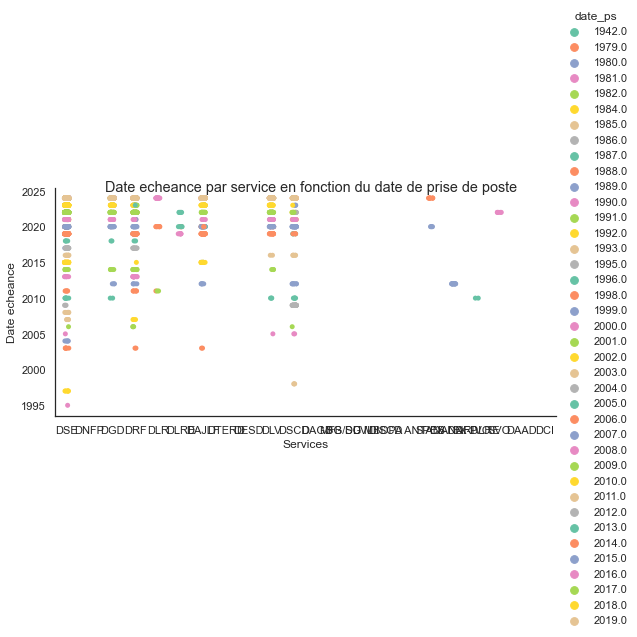

In [136]:
# sns.boxplot(x=qualitative[13], y=quantitative[9], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[9], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Date echeance par service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Date echeance")

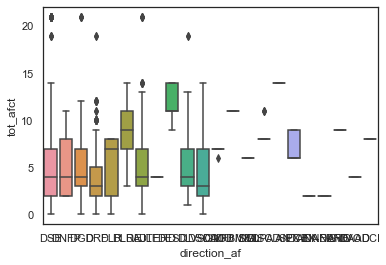

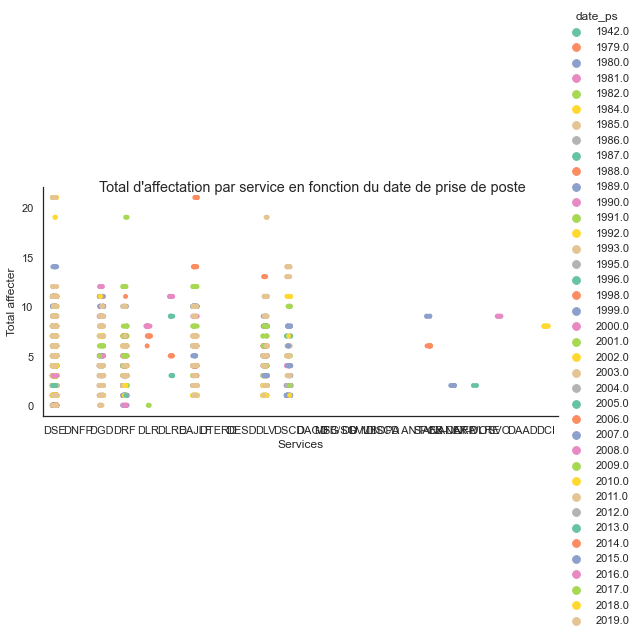

In [154]:
sns.boxplot(x=qualitative[13], y=quantitative[10], data=df)
sns.set_style("white")
p = sns.catplot(x = qualitative[13], y = quantitative[10], hue = quantitative[7], data = df, kind = "strip",palette = "Set2", height= 4, aspect = 2)
p.fig.suptitle("Total d'affectation par service en fonction du date de prise de poste")
p.set_axis_labels("Services", "Total affecter")

### Table de contingence

In [138]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[0]],  
                               margins = False) 
data_crosstab

sexe,FEMININ,MASCULIN
direction_af,,
DAAD,10,0
DAGD,1,4
DAJLF,186,410
DCI,9,0
DESD,13,3
DGD,176,483
DISCD,13,0
DLR,23,29
DLRE,70,70


In [139]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[2]],  
                               margins = True) 
data_crosstab

sit_fam,CELIBATAIRE,DIVORCE(E),MARIE(E),VEUF(VE),All
direction_af,,,,,
DAAD,0,0,10,0,10
DAGD,0,0,5,0,5
DAJLF,102,20,415,0,537
DCI,0,0,9,0,9
DESD,0,7,9,0,16
DGD,71,14,546,5,636
DISCD,0,10,3,0,13
DLR,0,0,52,0,52
DLRE,8,30,91,0,129


In [140]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[3]],  
                               margins = True) 
data_crosstab

nature,APTITUDE PROFESSIONNEL,APTITUDE PROFESSIONNELLE,ATTESTATION,CERTIFICAT,DIPLOME,FORMATION,All
direction_af,,,,,,,
DAAD,1,0,0,4,5,0,10
DAGD,0,0,0,3,2,0,5
DAJLF,102,6,11,79,372,26,596
DCI,4,0,1,0,3,1,9
DESD,5,0,0,2,9,0,16
DGD,94,53,16,65,386,45,659
DISCD,2,0,1,1,9,0,13
DLR,10,8,0,7,24,3,52
DLRE,51,2,2,9,58,18,140


In [141]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[4]],  
                               margins = True) 
data_crosstab

design,123EME ET 124EME SESSIONS DU CONSEIL DE COOPERATION DOUANIERE,125EME/126EME SESSION DU CONSEIL DE COOPERATION DOUANIERE,18EME SOMMET DES CHEFS D?ETAT ET DU GVT DU COMESA,1ERE ANNEE EN ECONOMIE,1ERE ANNEE EN GEOGRAPHIE,1ERE ANNEE EN LICENCE PROFESSIONNELLE EN INFORMATIQUE,20EME REUNION DU GROUPE DE PILOTAGE REGIONALE ET LA 19EME SESSION DU CA,22EME REUNION DU COMITE DES DIRECTEURS REGIONAUX,22EME REUNION DU COMITE DES DIRECTEURS REGIONAUX,2EME ANNEE DU SECOND CYCLE EN SCIENCES NATURELLES,...,VALEUR-ORIGINE,VALITRADE,VMWARE,WINDOWS-WORD-EXCEL-ACCESS,WORD-EXCEL,WORD-EXCEL-POWERPOINT,WORD-EXCEL-SAARI,"WORLD CUSTOM ORGANISATION, IT CONFERENCE AND EXHIBITION",YOUTH LEADERSHIP TRAINING PROGRAM,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAAD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
DAGD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
DAJLF,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,595
DCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DESD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
DGD,3,4,0,0,0,0,4,4,1,0,...,1,1,0,0,0,0,0,0,1,659
DISCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
DLR,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,52
DLRE,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,140


In [142]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[5]],  
                               margins = True) 
data_crosstab

mode_ent,AFFECTATION DEFINITIVE,CONCOURS DIRECT,CONTRAT D'ENGAGEMENT,DECISION D'ENGAGEMENT,DETACHEMENT,All
direction_af,,,,,,
DAAD,8,0,2,0,0,10
DAGD,1,0,4,0,0,5
DAJLF,0,468,87,40,0,595
DCI,0,0,9,0,0,9
DESD,0,10,6,0,0,16
DGD,0,419,155,78,3,655
DISCD,0,10,3,0,0,13
DLR,1,42,7,2,0,52
DLRE,0,116,24,0,0,140


In [143]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[6]],  
                               margins = True) 
data_crosstab

corps_ent,ADJOINT D'ADMINISTRATION,ADMINISTRATEUR CIVIL,ADMINISTRATEUR D'UNIVERSITE,ADMINISTRATEUR DE SERVICE DE L' A.N.,ADMINISTRATEUR DES SCES FINANCIERS,AGENT D'ENCADREMENT DES DOUANES,AGENT DE CONSTATATION DES DOUANES,ASSISTANT D'ADMINISTRATION,ASSISTANT D'ENSEIGNEMENT SUPERIEUR ET DE RECHERCHE,CHEF DE BUREAU DES SCES FINANCIERS,...,INSPECTEUR DES DOUANES,INSPECTEUR DU TRAVAIL ET DES LOIS SOCIALES,INSPECTEUR PENITENTIAIRE,MILITAIRE,OFFICIER DE POLICE,PERCEPTEUR DES FINANCES,PREPOSE DES DOUANES,PROFESSEUR CERTIFIE,SOUS-CHEF DE BUREAU DES SCES FINANCIERS,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAAD,0,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,10
DAGD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
DAJLF,0,0,0,12,0,25,21,0,6,0,...,255,0,0,14,8,0,16,0,0,596
DCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DESD,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,16
DGD,0,0,0,0,3,2,33,0,70,0,...,180,5,4,0,0,0,1,2,8,659
DISCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
DLR,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,0,3,0,0,52
DLRE,0,0,0,0,0,0,30,0,0,0,...,72,0,0,0,0,0,0,0,0,140


In [144]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[7]],  
                               margins = True) 
data_crosstab

poste_ent,11AN,12IV,13AB,14MA,15ZS,16ZE,17ZO,21TO,22TP,23MA,...,SRDAAMI,SRH,SRI,SS,SSAE,SSLC,SSOC,SST,SVO,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAAD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
DAGD,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
DAJLF,26,93,0,0,0,0,0,125,4,0,...,2,0,0,20,0,0,0,0,0,596
DCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DESD,0,13,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,16
DGD,28,39,0,0,0,0,0,83,0,0,...,0,9,7,23,0,0,0,0,6,658
DISCD,0,10,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,13
DLR,15,0,0,0,0,0,0,2,1,0,...,0,0,7,0,0,0,0,0,2,52
DLRE,30,32,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,135


In [145]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[8]],  
                               margins = True) 
data_crosstab

lieu_af,ANTALAHA,ANTANANARIVO,ANTENNE DES DOUANES ANOSISOA,ANTENNE DES DOUANES ANOSIZATO,ANTSIRABE,ANTSIRANANA,AUTRES BUREAUX,BETAINOMBY DEDIE SHERRITT,BMS DIEGO,BMS FIANARANTSOA,...,SERVICE DES STATISTIQUES ET DES ANALYSES ECONOMIQUES,SERVICE DU CONTROLE DES REGIMES SUSPENSIFS,SERVICE DU RENSEIGNEMENT ET DE L'ANALYSE DES RISQUES,"SERVICE DU RENSEIGNMT, DE LA DOC ET DE L'ASSIST ADMIN MUT INTLE",TAOLAGNARO,TOAMASINA-PETROLES,TOLIARA,VOHEMAR,WASHINGTON-DC,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAAD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
DAGD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
DAJLF,0,0,0,0,0,0,0,0,0,0,...,0,0,93,30,0,0,0,0,0,596
DCI,0,0,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DESD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
DGD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,659
DISCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
DLR,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,52
DLRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,140


In [146]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[9]],  
                               margins = True) 
data_crosstab

motif_affect,12IV ANNULE,1ERE AFFECTATION,1ERE POSTE,ABROGATION DRF,ABROGATION MAINTIEN 21TO,ABROGE,ABROGEE,ABROGEE SUIVANT DEC 007 DU 08/02/17,CE,CHEF DE DIVISION,...,NOMME RECEVEUR DES DOUANES DE SAMBAVA,NOMME RECEVEUR DES DOUANES DE TOAMASINA-PORT,NOUVELLEMENT RECRUTE,PREMIERE AFFECTATION,PROJET ANALYSE DE MANIFESTE,RAPPROCHEMENT,REAFFECTATION,REMPLACEMENT,STAGIAIRE COMPLEMENT D'EFFECTIF,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAGD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
DAJLF,0,0,0,0,0,0,26,0,5,0,...,0,0,0,0,0,0,0,0,0,346
DCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DESD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DGD,2,0,0,0,0,0,18,0,0,0,...,0,0,0,4,0,0,8,0,0,382
DISCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
DLR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52
DLRE,0,0,4,0,0,0,11,0,7,0,...,0,0,0,0,0,0,0,0,0,140
DLV,0,0,0,0,0,4,9,0,0,0,...,0,0,0,0,0,0,0,0,0,218


In [147]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[10]],
                               margins = True)
data_crosstab

fonction_af,ABROGE,ABROGEE,ADJOINT AU RECEVEUR,ADJOINT AU RECEVEUR 11AN,ADJOINT AU RECEVEUR 12IV,ADJOINT AU RECEVEUR 34AS,ADJOINT AU RECEVEUR DES DOUANES,ADJOINT CHEF DE SITE INFORMATIQUE,ADJOINT CHEF SECTEUR,ADJOINT DU CHEF DE PROJET,...,SUIVI ECOR ET STOCKS,TRAITEMENT DE DOSSIERS CONTENTIEUX,TRAITEMENT DOSSIERS CONTENTIEUX,UNITE MOBILE DE SURVEILLANCE,VERIFICATEUR,VERIFICATEUR-BILLETEUR,VISITEUR,VISITEUR A L'AIR MAD.COM,VISITEUR-ENLEVEMENT-PORTE,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAJLF,0,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,260
DCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DGD,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,334
DISCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
DLR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
DLRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51
DLV,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,222
DNFP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
DRF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,351


In [148]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[11]],  
                               margins = True) 
data_crosstab

division_af,ADJOINT AU RECEVEUR,AFFAIRES JURIDIQUES,APPLICATION CONVENTIONS INTERNATIONALES,APPLICATION DES REFORMES,APPUI,AUDIT,AUDIT ET PROCEDURE,BRIGADE,BRIGADE/OPCO,BSTMM,...,SUIVI STRATEGIQUE,TARIF,TECHNIQUE,TRANSIT ET SOUMISSION,UNITE DES SURVEILLANCES,UNITE DOUANIERE CONTRE LES TRAFICS DE STUP,VALEUR EN DOUANES ET BDD,VALEUR FOB ENGINS ET TRACTEURS IMP -VR,VVI,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAJLF,0,5,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85
DGD,0,0,0,0,0,3,0,0,0,0,...,7,0,0,0,0,0,0,0,0,52
DLV,0,0,0,2,0,0,0,0,0,0,...,0,3,0,0,0,0,6,2,0,35
DRF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,236
DSCD,0,0,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,44
DSE,9,0,0,0,0,0,4,1,3,3,...,0,0,0,2,2,8,0,0,0,203
DVL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
SG DU MBDPA ANTANANARIVO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
SPCB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [149]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[12]],  
                               margins = True) 
data_crosstab

service_af,CCSEAD,CDL,CELLULE DE GESTION DE PERFORMANCE,CGP,CPERF,ENSD,EXTERIEUR,PRMP,SAE,SAF,...,SRH (EX-SAF),SRI,SSAE,SSC,SSD,SSFRC,SSLC,SSOC,SVO,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAGD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
DAJLF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,516
DCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DESD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
DGD,10,21,14,3,28,0,4,30,0,64,...,0,0,0,0,0,0,0,0,0,352
DLR,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,0,4,52
DLRE,0,0,0,0,0,0,0,0,17,0,...,0,27,0,0,0,0,0,0,4,136
DLV,0,0,0,0,0,0,0,0,90,0,...,0,60,0,0,0,0,0,11,111,422
DNFP,0,0,0,0,0,9,0,0,0,0,...,0,0,0,0,0,3,0,0,0,17


In [150]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[14]],
                               margins = True) 
data_crosstab


poste_act,11AN,12IV,13AB,14MA,21TO,22TP,24SM,25BT,31AH,32SA,...,SLR,SPCB,SRAR,SRH,SRI,SSAE,SSLC,SSOC,SVO,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAAD,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,10
DAGD,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5
DAJLF,20,8,0,25,24,6,0,3,0,1,...,0,7,84,1,1,0,0,2,24,596
DCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DESD,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
DGD,30,23,0,10,7,4,0,0,7,0,...,2,6,8,9,1,0,4,0,12,659
DISCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
DLR,0,1,0,0,15,0,0,0,0,0,...,1,0,0,7,0,0,0,0,0,52
DLRE,8,0,6,0,12,9,0,0,0,0,...,0,0,0,0,0,0,4,0,0,140


In [151]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[15]],
                               margins = True) 
data_crosstab

job_act,,2EME ADJOINT CHEF SECTEUR BSTMM,ABROGEE,ADJOINT AU RECEVEUR,ADJOINT AU RECEVEUR - VERIFICATEUR,ADJOINT CHEF DE FILE-CHARGE DES AFFAIRES CTX,ADJOINT CHEF DE POSTE,ADJOINT CHEF DE SITE INFORMATIQUE,ADJOINT CHEF SECTEUR,ADMINISTRATEUR DE SITE,...,VERIFICATEUR-CTX-BILLETEUR,VISITEUR,VISITEUR BCB,VISITEUR ESCALE,Visiteur,Visiteur ESCALE,Visiteur Export/Fret,charg? d'enqu?tes,chef de division du contr?le RET,All
direction_af,,,,,,,,,,,,,,,,,,,,,
DAAD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
DAGD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
DAJLF,0,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,13,4,528
DCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
DESD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
DGD,0,0,0,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,13,0,607
DISCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
DLR,0,0,0,0,8,0,0,0,12,0,...,0,0,0,0,1,0,0,0,0,52
DLRE,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,128


In [152]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[16]],
                               margins = True)
data_crosstab

statut_act,DECEDE(E),EN FONCTION,FIN DE CONTRAT,RETRAITE(E),All
direction_af,,,,,
DAAD,0,2,0,8,10
DAGD,0,5,0,0,5
DAJLF,0,544,0,32,576
DCI,0,9,0,0,9
DESD,0,13,0,3,16
DGD,0,623,0,36,659
DISCD,0,13,0,0,13
DLR,0,30,0,22,52
DLRE,0,140,0,0,140


In [153]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[17]],
                               margins = True)
data_crosstab

IndexError: list index out of range

### Khi II

In [ ]:
from scipy.stats import chi2_contingency

def get_dependancy(df, columns):
    df_result = pd.DataFrame()
    for col1 in range(0, len(columns)):
        for col2 in range(col1+1, len(columns)):
            crosstab = pd.crosstab(df[columns[col1]], df[columns[col2]])
            p_value = chi2_contingency(crosstab)[1]
            df_result = df_result.append({"column1": columns[col1], "column2": columns[col2], "p_value":p_value}, ignore_index=True)
    return df_result

In [ ]:
get_dependancy(df,qualitative)

<h2><center> Analyse Quantitative </center></h2>

## I univarie

In [ ]:
df[quantitative].describe().T

In [ ]:
for  col in quantitative:  
        f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .5)})
        sns.histplot(df[col], ax = ax_hist)
        sns.boxplot(df[col], color = '#1f77b4', ax = ax_box)
        ax_box.set(xlabel='')
        plt.show()

### II Bivarie

In [ ]:
#Association entre 2 variables quantitatives
sns.pairplot(df)
plt.show()

In [ ]:
std_no_nul=[]
std_nul=[]
for  col in quantitative:  
    if np.std(df[col])!=0:
        std_no_nul.append(col)
    else:
        std_nul.append(col)
f, axes = plt.subplots(1, 1, figsize=(16, 16), sharex=False)
matrix = np.triu(df[std_no_nul].corr())
sns.heatmap(df[std_no_nul].corr(), annot=True,robust=False, mask=matrix, ax=axes)
#Cette matrice de corrélation nous dit que